In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

In [3]:
# Loading the Dataset file directly into a Pandas DataFrame object
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn", # Refers the Dataset handle
    "WA_Fn-UseC_-Telco-Customer-Churn.csv" # Refers the specific file in the dataset
)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [4]:
df_instance = df.copy()

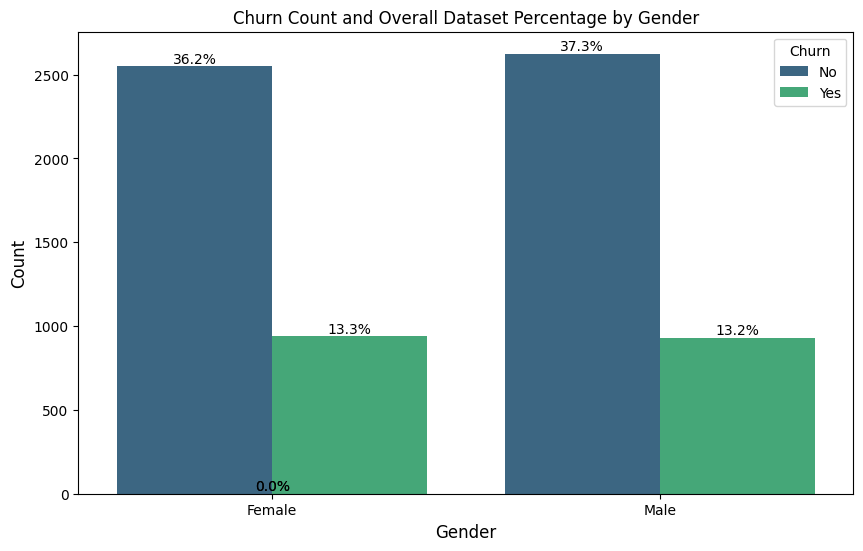

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette='viridis')

# Iterating through the bars to calculate and display the percentage
for p in ax.patches:
    # Calculating the percentage relative to the total number of customers
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Churn Count and Overall Dataset Percentage by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-802856149.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Senior (0)', 'Senior (1)'])


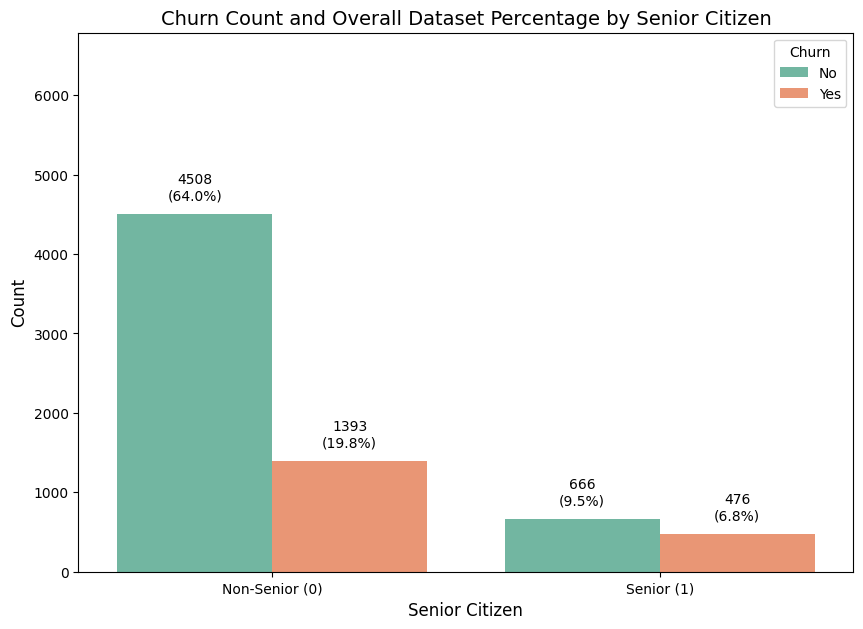

In [6]:
# Preparing the chart
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')

# Adding descriptive labels to the X-axis
ax.set_xticklabels(['Non-Senior (0)', 'Senior (1)'])

# Adding both Frequency and Percentage on top of each bar
# total_customers used to calculate the percentage of the whole dataset
total_customers = len(df)

for container in ax.containers:
    # Using custom labels to combine the count and the percentage
    labels = [f'{int(v.get_height())}\n({(v.get_height()/total_customers):.1%})'
              if v.get_height() > 0 else '' for v in container]

    # Applying labels directly on top of the bars
    ax.bar_label(container, labels=labels, padding=8, fontsize=10)

plt.title('Churn Count and Overall Dataset Percentage by Senior Citizen', fontsize=14)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, df['SeniorCitizen'].value_counts().max() * 1.15) # Add space for labels
plt.show()

/tmp/ipython-input-730554892.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


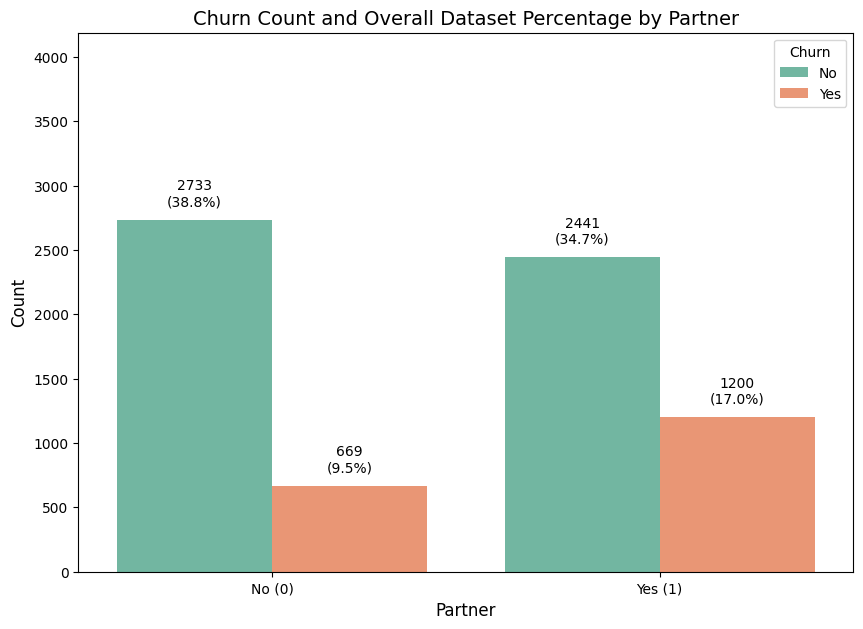

In [7]:
# Preparing the chart
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='Partner', hue='Churn', palette='Set2')

# Adding descriptive labels to the X-axis
ax.set_xticklabels(['No (0)', 'Yes (1)'])

# Adding both Frequency and Percentage on top of each bar
# total_customers is used to calculate the percentage of the whole dataset
total_customers = len(df)

for container in ax.containers:
    # Using custom labels to combine the count and the percentage
    labels = [f'{int(v.get_height())}\n({(v.get_height()/total_customers):.1%})'
              if v.get_height() > 0 else '' for v in container]

    # Applying labels directly on top of the bars
    ax.bar_label(container, labels=labels, padding=8, fontsize=10)

plt.title('Churn Count and Overall Dataset Percentage by Partner', fontsize=14)
plt.xlabel('Partner', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, df['Partner'].value_counts().max() * 1.15) # Add space for labels
plt.show()

/tmp/ipython-input-1795619245.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


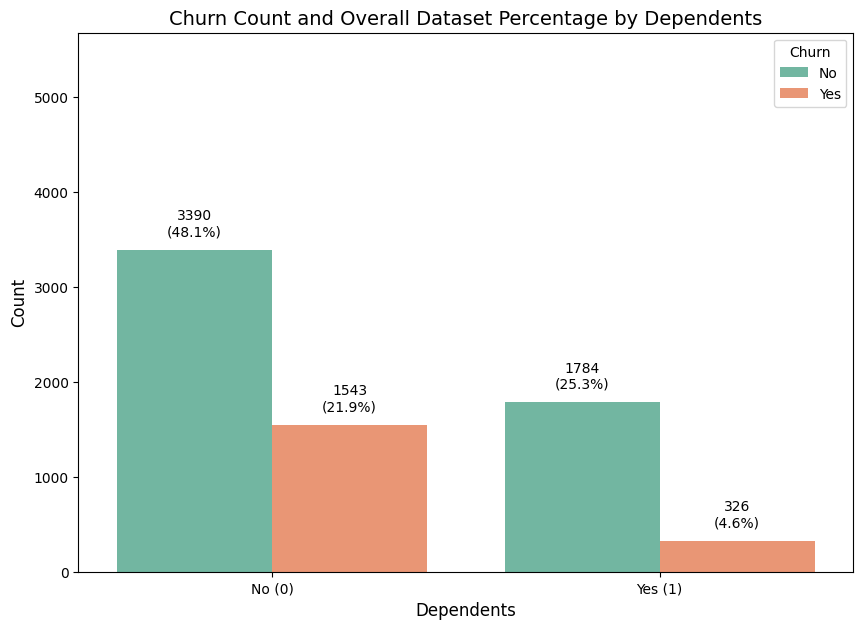

In [8]:
# Preparing the chart
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set2')

# Adding descriptive labels to the X-axis
ax.set_xticklabels(['No (0)', 'Yes (1)'])

# Adding both Frequency and Percentage on top of each bar
# total_customers used to calculate the percentage of the whole dataset
total_customers = len(df)

for container in ax.containers:
    # Using custom labels to combine the count and the percentage
    labels = [f'{int(v.get_height())}\n({(v.get_height()/total_customers):.1%})'
              if v.get_height() > 0 else '' for v in container]

    # Applying labels directly on top of the bars
    ax.bar_label(container, labels=labels, padding=8, fontsize=10)

plt.title('Churn Count and Overall Dataset Percentage by Dependents', fontsize=14)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, df['Dependents'].value_counts().max() * 1.15) # Add space for labels
plt.show()

In [9]:
df_instance.drop(columns=['customerID','gender','PhoneService'], inplace=True)

In [10]:
# Applying one-hot encoding to 'MultipleLines'
df_instance = pd.get_dummies(df_instance, columns=['MultipleLines'], drop_first=True, dtype=int)

In [11]:
# Applying one-hot encoding to 'InternetService'
df_instance = pd.get_dummies(df_instance, columns=['InternetService'], dtype=int)

# Manually dropping the 'No' column
df_instance.drop(columns=['InternetService_No'], inplace=True)

In [12]:
# Applying one-hot encoding to 'Partner'
df_instance = pd.get_dummies(df_instance, columns=['Partner'], drop_first=True, dtype=int)

In [13]:
# Applying one-hot encoding to 'Dependents'
df_instance = pd.get_dummies(df_instance, columns=['Dependents'], drop_first=True, dtype=int)

In [14]:
# Applying one-hot encoding to 'Contract'
df_instance = pd.get_dummies(df_instance, columns=['Contract'], dtype=int)

In [15]:
# Applying one-hot encoding to 'PaperlessBilling'
df_instance = pd.get_dummies(df_instance, columns=['PaperlessBilling'], drop_first="true", dtype=int)

In [16]:
# Applying one-hot encoding to 'PaymentMethod'
df_instance = pd.get_dummies(df_instance, columns=['PaymentMethod'], dtype=int)

In [17]:
# Applying one-hot encoding to 'Churn'
df_instance = pd.get_dummies(df_instance, columns=['Churn'], drop_first="true", dtype=int)

In [18]:
df_instance.drop(columns=['OnlineSecurity','OnlineSecurity','OnlineBackup','OnlineBackup','DeviceProtection','DeviceProtection','TechSupport','TechSupport','StreamingTV','StreamingTV','StreamingMovies','StreamingMovies'], inplace=True)

In [19]:
df_instance.shape

(7043, 19)

In [20]:
df_instance.head(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Partner_Yes,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.5,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [21]:
# Converting TotalCharges to numeric, turning empty strings into NaNs
df_instance['TotalCharges'] = pd.to_numeric(df_instance['TotalCharges'], errors='coerce')

# Dropping rows with NaN values
df_instance.dropna(subset=['TotalCharges'], inplace=True)

# Renaming the target column from 'Churn_Yes' to 'Churn'
df_instance = df_instance.rename(columns={'Churn_Yes': 'Churn'})

X = df_instance.drop('Churn', axis=1)
y = df_instance['Churn']

# Initializing and applying the MinMaxScaler
scaler = MinMaxScaler()
X_scaled_array = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
# Combine features and target into one DataFrame
test_data = X_test.copy()
test_data['Churn'] = y_test.values

if 'Churn' in test_data.columns:
    print("✅ SUCCESS: 'Churn' column is present!")
    print(f"Column Names: {list(test_data.columns[-3:])}") # Shows last 3 columns
else:
    print("❌ ERROR: 'Churn' column is still missing!")

# Save to the Colab environment
test_data.to_csv('test_data.csv', index=False)

✅ SUCCESS: 'Churn' column is present!
Column Names: ['PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, accuracy_score

# Initialize the 6 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(n_neighbors=83),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = []

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calculate all 6 required metrics
    results.append({
        "ML Model Name": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })

# Create the Comparison Table for your README
comparison_df = pd.DataFrame(results)
display(comparison_df)

,ML Model Name,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.795261,0.835953,0.642384,0.518717,0.573964,0.445591
1,Decision Tree,0.728436,0.655377,0.489510,0.499109,0.494263,0.308697
2,kNN,0.781991,0.822475,0.613995,0.484848,0.541833,0.406197
3,Naive Bayes,0.724645,0.819063,0.489107,0.800357,0.607167,0.443416
4,Random Forest,0.779147,0.810393,0.602151,0.499109,0.545809,0.404680
5,XGBoost,0.772512,0.811219,0.587097,0.486631,0.532164,0.386564


In [25]:
# Create model directory
os.makedirs('model', exist_ok=True)

# Save all models
for name, model in models.items():
    joblib.dump(model, f'model/{name.replace(" ", "_").lower()}.pkl')

joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef, confusion_matrix
)

# 1. Page Configuration
st.set_page_config(page_title="Telco Churn Predictor", layout="wide")
st.title("📞 Telco Customer Churn Prediction App")
st.markdown("Download the sample test data, then upload it to evaluate performance.")

# --- DOWNLOAD BUTTON ---
st.subheader("1. Download Test Data")
sample_file_path = "test_data.csv"

if os.path.exists(sample_file_path):
    with open(sample_file_path, "rb") as file:
        st.download_button(
            label="📥 Download Sample Test CSV",
            data=file,
            file_name="test_data.csv",
            mime="text/csv"
        )
else:
    st.warning("Ensure 'test_data.csv' is in your GitHub root.")

st.divider()

# 2. Sidebar - Model Selection
st.sidebar.header("Settings")
model_option = st.sidebar.selectbox(
    "Choose a Machine Learning Model",
    ("Logistic Regression", "Decision Tree", "kNN", "Naive Bayes", "Random Forest", "XGBoost")
)

# 3. Load Assets
@st.cache_resource
def load_assets(name):
    model_name_clean = name.replace(" ", "_").lower()
    model = joblib.load(f'model/{model_name_clean}.pkl')
    scaler = joblib.load('model/scaler.pkl')
    return model, scaler

# 4. Main App Logic
st.subheader("2. Evaluate Model")
uploaded_file = st.file_uploader("Upload your test CSV file", type=["csv"])

if uploaded_file is not None:
    test_df = pd.read_csv(uploaded_file)
    target_col = 'Churn' # Updated to match your request

    if target_col in test_df.columns:
        y_true = test_df[target_col]
        X_test_raw = test_df.drop(columns=[target_col])

        try:
            model, scaler = load_assets(model_option)

            # Align features and scale
            trained_features = model.feature_names_in_
            X_test_aligned = X_test_raw[trained_features]
            X_test_scaled = scaler.transform(X_test_aligned)

            # Predict
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred

            # 5. Display Metrics
            st.subheader(f"📊 Evaluation Metrics: {model_option}")
            cols = st.columns(6)
            metrics = {
                "Accuracy": accuracy_score(y_true, y_pred),
                "AUC": roc_auc_score(y_true, y_proba),
                "Precision": precision_score(y_true, y_pred),
                "Recall": recall_score(y_true, y_pred),
                "F1": f1_score(y_true, y_pred),
                "MCC": matthews_corrcoef(y_true, y_pred)
            }
            for i, (label, val) in enumerate(metrics.items()):
                cols[i].metric(label, f"{val:.4f}")

            # 6. Confusion Matrix
            st.subheader("📉 Confusion Matrix")
            fig, ax = plt.subplots(figsize=(5, 3))
            sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
            st.pyplot(fig)

        except Exception as e:
            st.error(f"Error: {e}")
    else:
        st.error(f"Column '{target_col}' not found in uploaded file.")

Writing app.py
